<a href="https://colab.research.google.com/github/Hyuna13/Data_Science/blob/master/EDA_basic4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving laptops.csv to laptops.csv


In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('laptops.csv')
df.head()

,brand,model,ram,hd_type,hd_size,screen_size,price,processor_brand,processor_model,clock_speed,graphic_card_brand,graphic_card_size,os,weight,comments
0,Dell,Inspiron 15-3567,4,hdd,1024,15.6,40000,intel,i5,2.5,intel,NaN,linux,2.50,NaN
1,Apple,MacBook Air,8,ssd,128,13.3,55499,intel,i5,1.8,intel,2.0,mac,1.35,NaN
2,Apple,MacBook Air,8,ssd,256,13.3,71500,intel,i5,1.8,intel,2.0,mac,1.35,NaN
3,Apple,MacBook Pro,8,ssd,128,13.3,96890,intel,i5,2.3,intel,2.0,mac,3.02,NaN
4,Apple,MacBook Pro,8,ssd,256,13.3,112666,intel,i5,2.3,intel,2.0,mac,3.02,NaN


In [11]:
#카테고리 분류
brand_nation = {
    'Dell': 'U.S.',
    'Apple': 'U.S.',
    'Acer': 'Taiwan',
    'HP':'U.S.',
    'Lenovo': 'China',
    'Alienware': 'U.S.',
    'Microsoft': 'U.S.',
    'Asus': 'Taiwan'
} 

In [12]:
df['brand'].map(brand_nation)

0        U.S.
1        U.S.
2        U.S.
3        U.S.
4        U.S.
        ...  
162    Taiwan
163    Taiwan
164    Taiwan
165    Taiwan
166    Taiwan
Name: brand, Length: 167, dtype: object

In [13]:
df['brand_nation'] = df['brand'].map(brand_nation)
df

,brand,model,ram,hd_type,hd_size,screen_size,price,processor_brand,processor_model,clock_speed,graphic_card_brand,graphic_card_size,os,weight,comments,brand_nation
0,Dell,Inspiron 15-3567,4,hdd,1024,15.6,40000,intel,i5,2.5,intel,NaN,linux,2.50,NaN,U.S.
1,Apple,MacBook Air,8,ssd,128,13.3,55499,intel,i5,1.8,intel,2.0,mac,1.35,NaN,U.S.
2,Apple,MacBook Air,8,ssd,256,13.3,71500,intel,i5,1.8,intel,2.0,mac,1.35,NaN,U.S.
3,Apple,MacBook Pro,8,ssd,128,13.3,96890,intel,i5,2.3,intel,2.0,mac,3.02,NaN,U.S.
4,Apple,MacBook Pro,8,ssd,256,13.3,112666,intel,i5,2.3,intel,2.0,mac,3.02,NaN,U.S.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Asus,A555LF,8,hdd,1024,15.6,39961,intel,i3 4th gen,1.7,nvidia,2.0,windows,2.30,NaN,Taiwan
163,Asus,X555LA-XX172D,4,hdd,500,15.6,28489,intel,i3 4th gen,1.9,intel,NaN,linux,2.30,NaN,Taiwan
164,Asus,X554LD,2,hdd,500,15.6,29199,intel,i3 4th gen,1.9,intel,1.0,linux,2.30,NaN,Taiwan
165,Asus,X550LAV-XX771D,2,hdd,500,15.6,29990,intel,i3 4th gen,1.7,intel,NaN,linux,2.50,NaN,Taiwan


In [17]:
#groupby
nation_groups = df.groupby('brand_nation')
type(nation_groups)

pandas.core.groupby.generic.DataFrameGroupBy

In [18]:
nation_groups.count()

,brand,model,ram,hd_type,hd_size,screen_size,price,processor_brand,processor_model,clock_speed,graphic_card_brand,graphic_card_size,os,weight,comments
brand_nation,,,,,,,,,,,,,,,
China,18,18,18,18,18,18,18,18,18,18,18,17,18,18,18
Taiwan,44,44,44,44,44,44,44,44,44,44,43,14,44,42,9
U.S.,105,105,105,105,105,105,105,105,105,104,102,50,105,100,28


In [22]:
nation_groups.mean()

,ram,hd_size,screen_size,price,clock_speed,graphic_card_size,weight
brand_nation,,,,,,,
China,6.000000,1080.888889,15.300000,47347.777778,2.500000,2.352941,2.461111
Taiwan,6.272727,726.363636,14.970455,53320.409091,2.164545,288.285714,2.242381
U.S.,7.314286,733.257143,14.603429,71541.295238,2.356346,2.980000,2.216500


In [24]:
nation_groups.first()

,brand,model,ram,hd_type,hd_size,screen_size,price,processor_brand,processor_model,clock_speed,graphic_card_brand,graphic_card_size,os,weight,comments
brand_nation,,,,,,,,,,,,,,,
China,Lenovo,300–15IBR,8,hdd,1024,15.6,40990,intel,i5,2.3,amd,2.0,linux,3.2,2.7 customer rating
Taiwan,Acer,Predator Helios 300,16,ssd,1024,15.6,101839,intel,i7,2.8,nvidia,6.0,windows,2.7,Gaming Laptop
U.S.,Dell,Inspiron 15-3567,4,hdd,1024,15.6,40000,intel,i5,2.5,intel,2.0,linux,2.5,Integrated Graphics


In [25]:
nation_groups.last()

,brand,model,ram,hd_type,hd_size,screen_size,price,processor_brand,processor_model,clock_speed,graphic_card_brand,graphic_card_size,os,weight,comments
brand_nation,,,,,,,,,,,,,,,
China,Lenovo,IdeaPad 520-15IKB 80YL00RXIN,8,hdd,1024,15.6,69990,intel,i7,3.5,nvidia,4.0,windows,2.2,"Core i7-7500U 7th Gen processor, Dolby Audio"
Taiwan,Asus,X540LA-XX538T,4,hdd,1024,15.6,30899,intel,i3 5th gen,2.0,intel,1.0,windows,2.3,Integrated Graphics
U.S.,Microsoft,Surface Book CR9-00013,8,ssd,128,13.5,178799,intel,i5,1.8,intel,2.0,windows,1.5,Integrated Graphics


brand_nation
China     AxesSubplot(0.125,0.125;0.775x0.755)
Taiwan    AxesSubplot(0.125,0.125;0.775x0.755)
U.S.      AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

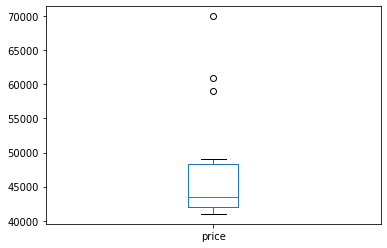

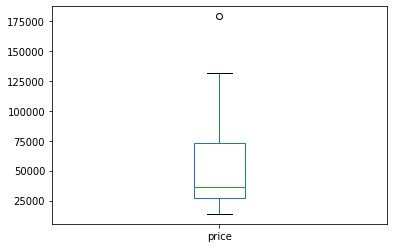

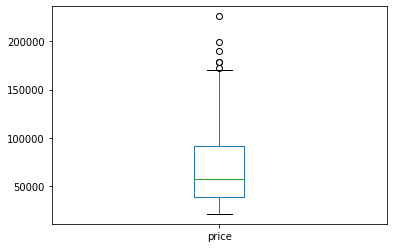

In [28]:
nation_groups.plot(kind='box', y='price')

brand_nation
China     AxesSubplot(0.125,0.125;0.775x0.755)
Taiwan    AxesSubplot(0.125,0.125;0.775x0.755)
U.S.      AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

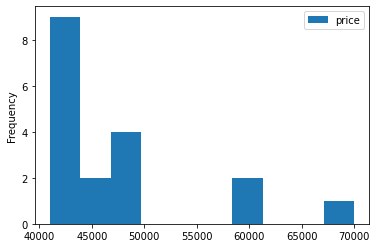

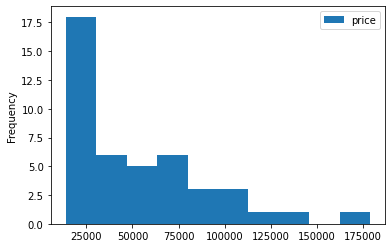

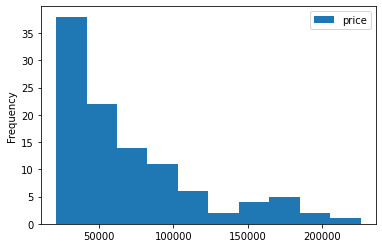

In [29]:
nation_groups.plot(kind='hist', y='price')

In [1]:
from google.colab import files
uploaded = files.upload()

Saving vegetable_price.csv to vegetable_price.csv
Saving vegetable_quantity.csv to vegetable_quantity.csv


In [3]:
import pandas as pd
price_df = pd.read_csv('vegetable_price.csv')
quantity_df = pd.read_csv('vegetable_quantity.csv')

In [4]:
price_df

,Product,Price
0,Potato,3000
1,Onion,1600
2,Avocado,5000
3,Garlic,1200
4,Tomato,3500
5,Lettuce,2000
6,Carrot,2500


In [5]:
quantity_df

,Product,Quantity
0,Potato,25
1,Onion,31
2,Avocado,57
3,Pepper,46
4,Broccoli,25
5,Cucumber,9


In [6]:
#데이터합치기
pd.merge(price_df, quantity_df, on='Product')

,Product,Price,Quantity
0,Potato,3000,25
1,Onion,1600,31
2,Avocado,5000,57


In [7]:
pd.merge(price_df, quantity_df, on='Product', how='left')

,Product,Price,Quantity
0,Potato,3000,25.0
1,Onion,1600,31.0
2,Avocado,5000,57.0
3,Garlic,1200,NaN
4,Tomato,3500,NaN
5,Lettuce,2000,NaN
6,Carrot,2500,NaN


In [8]:
pd.merge(price_df, quantity_df, on='Product', how='right')

,Product,Price,Quantity
0,Potato,3000.0,25
1,Onion,1600.0,31
2,Avocado,5000.0,57
3,Pepper,NaN,46
4,Broccoli,NaN,25
5,Cucumber,NaN,9


In [9]:
pd.merge(price_df, quantity_df, on='Product', how='outer')

,Product,Price,Quantity
0,Potato,3000.0,25.0
1,Onion,1600.0,31.0
2,Avocado,5000.0,57.0
3,Garlic,1200.0,NaN
4,Tomato,3500.0,NaN
5,Lettuce,2000.0,NaN
6,Carrot,2500.0,NaN
7,Pepper,NaN,46.0
8,Broccoli,NaN,25.0
9,Cucumber,NaN,9.0
